In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
# plotter function
def plotter(df_all,task,dataset):
    df_avg = df_all.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()
    sns.set(style="whitegrid")
    plt.figure(figsize=(5, 4))
    ax = sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg)
    #plot overall avaergae line
    df_avg_overall = df_avg.groupby(['Threshold'])['Accuracy'].mean().reset_index()
    plt.plot(df_avg_overall['Threshold'],df_avg_overall['Accuracy'],label='Overall Average',color='black')
    plt.title('Average Accuracy per Threshold for '+task+' task on '+dataset+' dataset')
    plt.show()

Processing for task p1


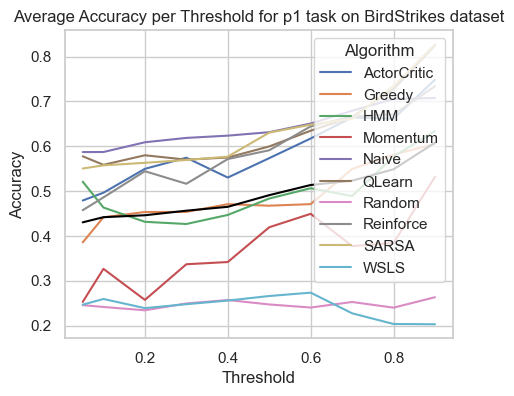

Processing for task p2


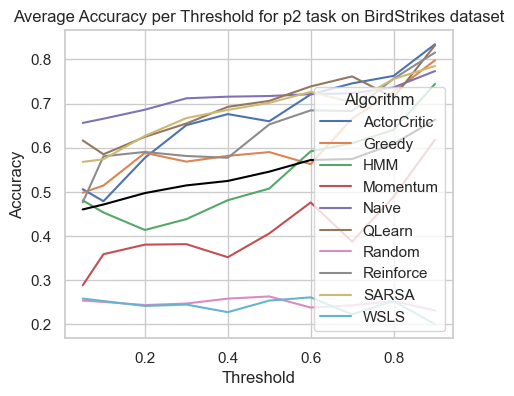

Processing for task p3


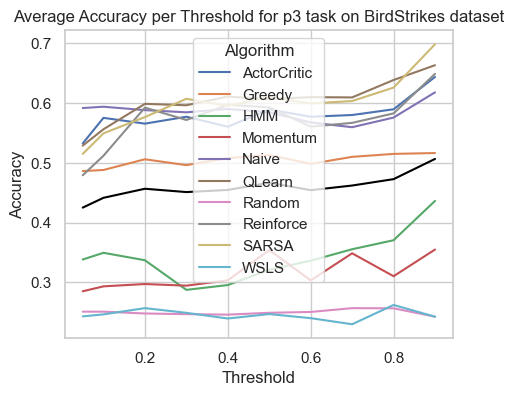

Processing for task p4


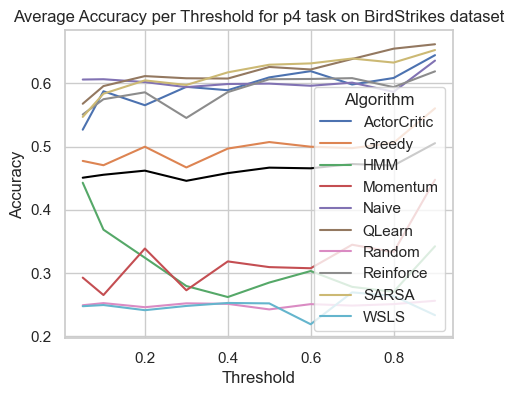

In [30]:
import pandas as pd

# Define the tasks
tasks = ['p1', 'p2', 'p3', 'p4']
df_all_master= pd.DataFrame()
# Loop over each task
for task in tasks:
    results_path = f'./{task}/'
    algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'Naive', 'WSLS','HMM','Momentum'])
    print('Processing for task', task)

    # Initialize an empty DataFrame to store results for the task
    df_all = pd.DataFrame()

    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(results_path + algo + '.csv')
            #openended or not column
            if task in ['p1','p2']:
                df['Openended'] = 'Focused'
            else:
                df['Openended'] = 'Openended'
            # Add a 'task' column to the DataFrame
            df['Task'] = task

            # Add an 'Algorithm' column to the DataFrame
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue

        # Concatenate the current DataFrame with the DataFrame for all algorithms
        df_all = pd.concat([df_all, df])

        dataset= 'BirdStrikes'
        filename = f'all_experiments_{dataset}_{task}.csv'
        df_all.to_csv(filename, index=False)
        df_all_master = pd.concat([df_all_master, df_all])
    plotter(df_all,task,'BirdStrikes')

df_all_master.to_csv('all_experiments_BirdStrikes.csv', index=False)



# # plot openended subste
# plotter(df_all[df_all['Openended']=='Focused'],'Openended','birdstrikes')
# # plot focused subset
# plotter(df_all[df_all['Openended']=='Focused'],'Focused','birdstrikes')

In [31]:
#subset df_all with column Openended

/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_27280/1272693087.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_27280/1272693087.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_27280/1272693087.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
/var/folders/w6/jn7_623d6d96165_8x9l_vqh0000gn/T/ipykernel_27280/1272693087.py:14: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.lineplot(x="Threshold", y="Accuracy", hue="

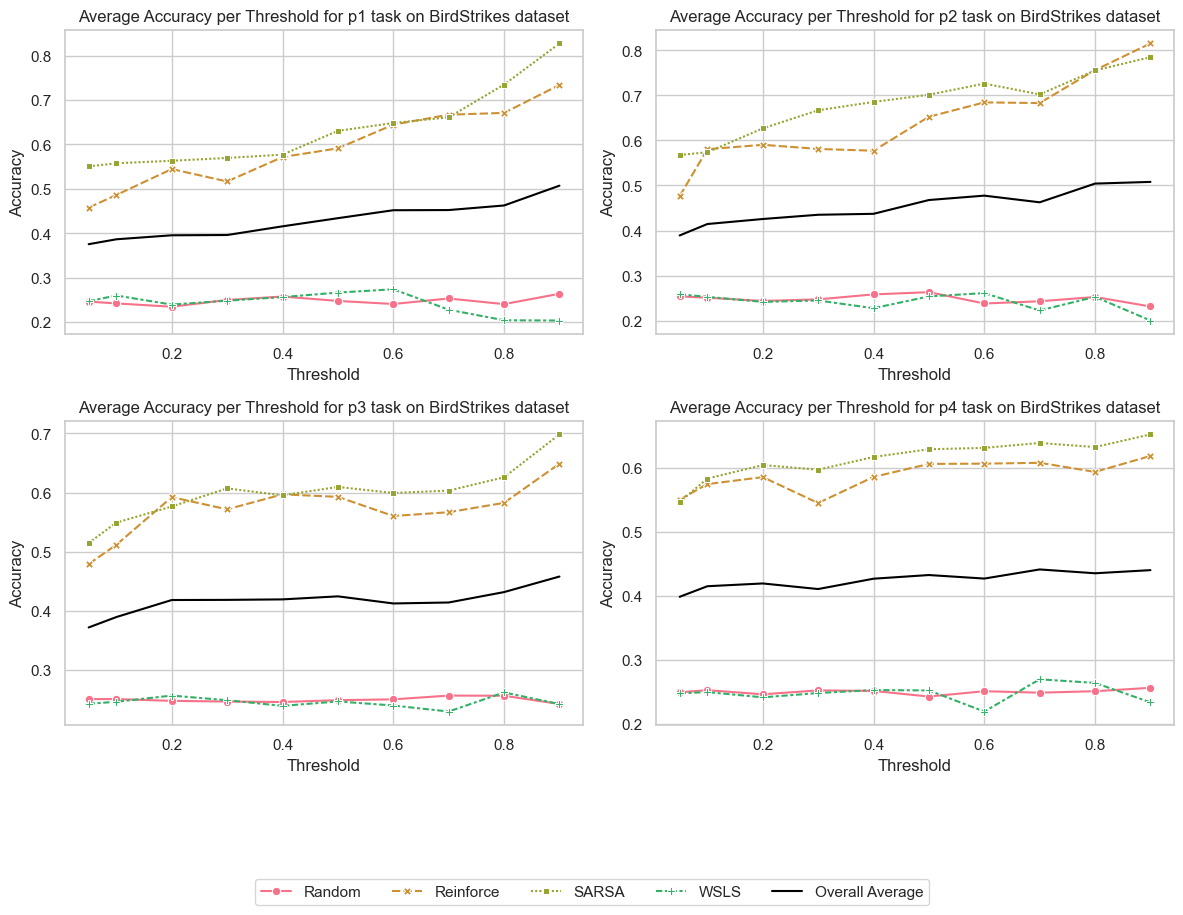

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the plotter function
def plotter(ax, df_all, task, dataset):
    # Define a color palette with the same colors for each algorithm
    palette = sns.color_palette('husl', n_colors=len(algorithms))

    # Group by 'Threshold' and 'Algorithm' and calculate the mean accuracy
    df_avg = df_all.groupby(['Threshold', 'Algorithm'])['Accuracy'].mean().reset_index()

    # Create the line plot with specified palette and markers
    sns.lineplot(x="Threshold", y="Accuracy", hue="Algorithm", data=df_avg, ax=ax,
                 palette=palette, markers=True, style="Algorithm")

    # Plot the overall average line
    df_avg_overall = df_avg.groupby(['Threshold'])['Accuracy'].mean().reset_index()
    ax.plot(df_avg_overall['Threshold'], df_avg_overall['Accuracy'], label='Overall Average', color='black')

    # Set title
    ax.set_title('Average Accuracy per Threshold for ' + task + ' task on ' + dataset + ' dataset')

    # Remove legend
    ax.legend().remove()

# Define the tasks, results path, and algorithms
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = sorted(['Random', 'Greedy', 'SARSA', 'QLearn', 'Reinforce', 'ActorCritic', 'Naive', 'WSLS'])

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Initialize an empty list to collect legend handles and labels
legend_handles = []
legend_labels = []

# Loop over each task
for i, task in enumerate(tasks):
    # Initialize an empty DataFrame to store results
    df_all = pd.DataFrame()

    # Loop over each algorithm
    for algo in algorithms:
        try:
            # Read the CSV file for the algorithm
            df = pd.read_csv(f'./{task}/{algo}.csv')
            df['Algorithm'] = algo
        except FileNotFoundError:
            print('No file for', algo)
            continue

        # Concatenate the current DataFrame with the DataFrame for all algorithms
        if algo == 'Random':
            df_all = df
        else:
            df_all = pd.concat([df_all, df])

    # Pass the current axes and data to the plotter function
    plotter(axes[i], df_all, task, 'BirdStrikes')

    # Get legend handles and labels for the last chart
    if task == tasks[-1]:
        handles, labels = axes[i].get_legend_handles_labels()
        legend_handles.extend(handles)
        legend_labels.extend(labels)

# Adjust layout
plt.tight_layout()

# Add legend horizontally at the bottom for all algorithms
fig.legend(legend_handles, legend_labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=len(algorithms))

# Show the plot
plt.show()
